In [1]:
# General library for Machine learning

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#Cross Validation Library

from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Original Source of the dataset -> https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [3]:
#Read dataset

data = pd.read_csv('https://raw.githubusercontent.com/Gwen00369/CIS_9660/main/water_potability.csv')

In [4]:
#top 5 row from dataset

data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
#Check dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
#number of row and column in the dataset

data.shape

(3276, 10)

In [7]:
#Statistic summary for the dataset

data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
#Check for missing field

data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

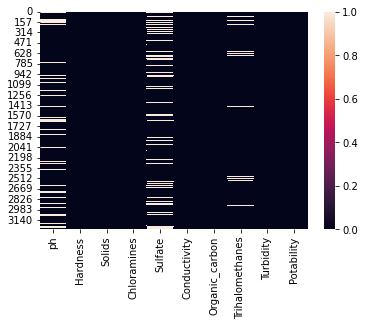

In [9]:
#visualization for missing field

sns.heatmap(data.isna())

In [10]:
#find the median in 'ph' column 

data['ph'].median()

7.036752103833548

In [11]:
#Replace the missing value

data['ph'].fillna(data['ph'].median(), inplace = True)

In [12]:
#find median the for the column

data['Trihalomethanes'].median()

66.62248509808484

In [13]:
#Replace missing value with the median value

data['Trihalomethanes'].fillna(data['Trihalomethanes'].median(), inplace = True)

In [14]:
#find median value for sulfate column

data['Sulfate'].median()

333.073545745888

In [15]:
#replace null value with median value

data['Sulfate'].fillna(data['Sulfate'].median(), inplace = True)

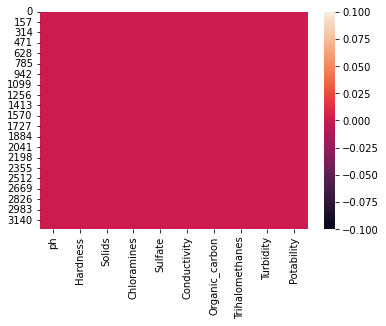

In [16]:
#heatmap for missing data

sns.heatmap(data.isna())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


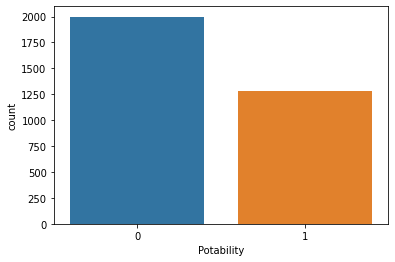

In [17]:
#see distribution of data 

sns.countplot('Potability', data = data)

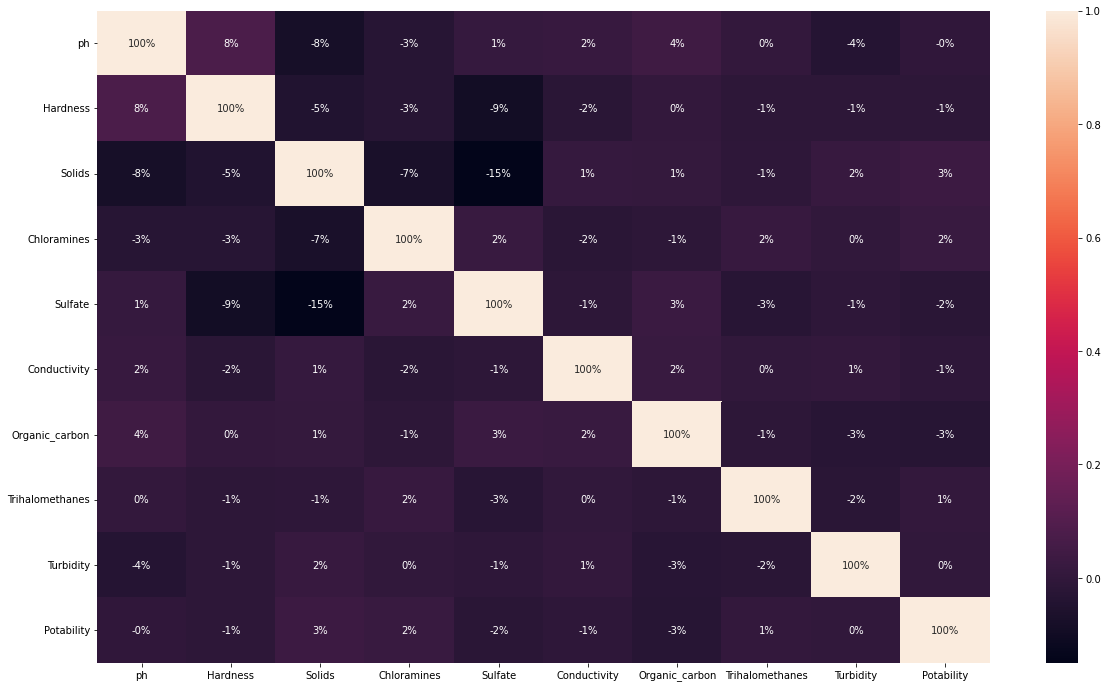

In [18]:
#Correlation heatmap for visualization

plt.figure(figsize=(20,12))

sns.heatmap(data.corr(), annot=True, fmt = '.0%')

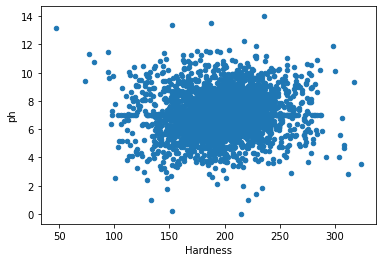

In [19]:
#scatter plot for visualization

data.plot.scatter(x = 'Hardness', y = 'ph')

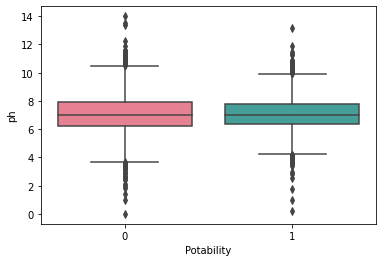

In [20]:
#Boxplot created for visualization

sns.boxplot(x = 'Potability', y = 'ph', palette = 'husl', data = data)

In [21]:
#Check our dataset

data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [22]:
#Define the independent variables

X = data[['ph','Hardness', 'Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]

In [23]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


In [24]:
#Define dependent variable 

y = data[['Potability']]

In [25]:
y

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


In [26]:
##Split dataset into training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [27]:
#Perform standardization

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression Method**

In [28]:
#libraries for Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [29]:
#Define and fit model

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
# 5 Fold cross validation for Logistic Regression
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(lr, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6053077223126028


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [31]:
#prediction using model

y_pred = lr.predict(X_test)

In [32]:
#Generate confusion matrix

confusion_matrix(y_test, y_pred)

array([[615,   0],
       [366,   2]])

In [33]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predict Negative (not Potability)', 'Predict Positive (Potability)'], index = [ 'Actual Negative (not Potability)', 'Actual Positive (Potability)'] ) 

,Predict Negative (not Potability),Predict Positive (Potability)
Actual Negative (not Potability),615,0
Actual Positive (Potability),366,2


In [34]:
#Generated classificaation report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       615
           1       1.00      0.01      0.01       368

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



**Decision Tree method**

In [35]:
#library for Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [36]:
#Define and fit model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
#Parameter for decision tree

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
# 5 Fold cross validaation for Decision tree

result = cross_val_score(dt, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.5804663641293489


In [39]:
#making prediction

y_pred_dt = dt.predict(X_test)

In [40]:
#generate classication report

print(classification_report(y_test, y_pred_dt, target_names = ['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.68      0.66      0.67       615
    negative       0.46      0.48      0.47       368

    accuracy                           0.59       983
   macro avg       0.57      0.57      0.57       983
weighted avg       0.60      0.59      0.60       983



**Random Forest Method**

In [41]:
#library for Random Forest

from sklearn.ensemble import RandomForestClassifier

In [42]:
#Define and fit model

rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [43]:
# 5 Fold cross valaidation for Random forest

result = cross_val_score(rf, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

 Avg accuracy:0.6284280427357746


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [44]:
#Making prediction & generate classification report

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       615
           1       0.55      0.32      0.41       368

    accuracy                           0.65       983
   macro avg       0.61      0.58      0.58       983
weighted avg       0.63      0.65      0.62       983



**K-Nearest Neighbors Method**

In [45]:
#libraries for KNN

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#defining features

X = data[['ph','Hardness', 'Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].values

In [47]:
#defining label 

y = data[['Potability']].values

In [48]:
#Split dataset into training & testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [49]:
#Preform standardization

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
#Define and fit model

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [51]:
# 5 Fold Cross Validation for KNN

k = 5
kf = KFold(n_splits=k)
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6057482090361618


In [52]:
# Prediction using KNN

y_pred_knn = knn.predict(X_test)

In [53]:
#Generate classification report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72       610
           1       0.52      0.40      0.46       373

    accuracy                           0.63       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.62      0.63      0.62       983



**Naive Bayes Method**

In [54]:
#Library for Naive Bayes

from sklearn.naive_bayes import GaussianNB

In [55]:
#Define and fit model

gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [56]:
#5 Fold Cross Validation for Naive Bayes

result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6244960089809821


In [57]:
#Making Prediction

y_pred_gnb = gnb.predict(X_test)

In [58]:
#Generate classification report

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       610
           1       0.49      0.23      0.31       373

    accuracy                           0.62       983
   macro avg       0.56      0.54      0.52       983
weighted avg       0.58      0.62      0.57       983



**Support Vector Machine Method**

In [59]:
#import library for SVM

from sklearn import svm

In [60]:
#Various SVMs with different parameters

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

In [61]:
#5 Fold cross validation on Linear SVM

result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6053067709373899


In [62]:
#5 Fold cross validation on RBF SVM

result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6031233648238528


In [63]:
#5 Fold cross validation on Poly SVM

result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6105412373586019


In [64]:
#5 Fold cross validation on sigmoid SVM

result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.5547278591203584


In [65]:
# Linear SVM classification report

svm_linear_pred = linear.predict(X_test)

print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.00      0.00      0.00       373

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.39      0.62      0.48       983



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
#Poly SVM Classification report

svm_poly_pred = poly.predict(X_test)

print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       610
           1       0.60      0.06      0.10       373

    accuracy                           0.63       983
   macro avg       0.61      0.52      0.43       983
weighted avg       0.62      0.63      0.51       983



In [67]:
#Sigmoid SVM classification report

svm_sig_pred = sig.predict(X_test)

print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       610
           1       0.36      0.33      0.34       373

    accuracy                           0.52       983
   macro avg       0.49      0.49      0.49       983
weighted avg       0.52      0.52      0.52       983



In [68]:
#RBF SVM classification report

svm_rbf_pred = rbf.predict(X_test)

print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75       610
           1       0.40      0.07      0.12       373

    accuracy                           0.61       983
   macro avg       0.51      0.50      0.43       983
weighted avg       0.54      0.61      0.51       983



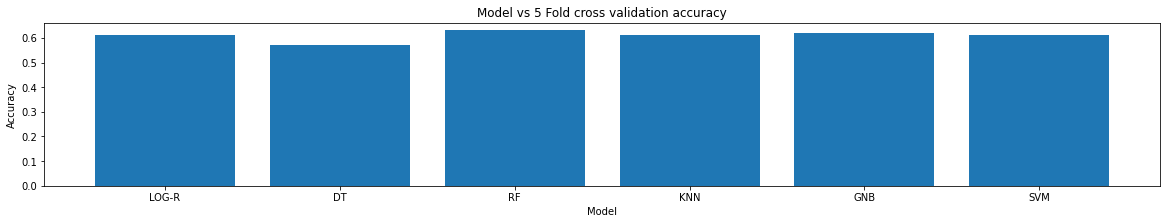

In [73]:
#Graph for cross validation

x = ['LOG-R', 'DT', 'RF','KNN','GNB','SVM']
y = [0.61,0.57,0.63,0.61,0.62,0.61]

plt.bar(x,y)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model vs 5 Fold cross validation accuracy")


plt.show()

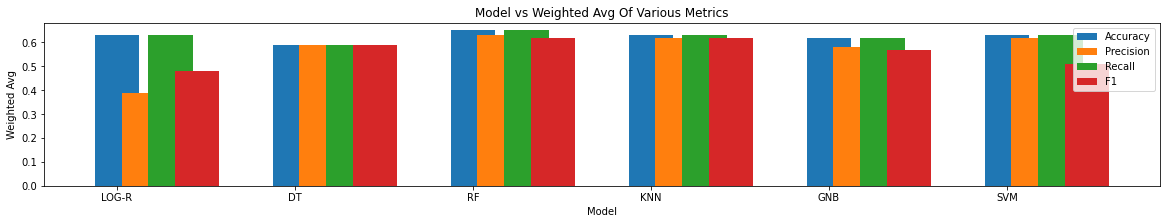

In [72]:
#Graph for summary of classification matrix

X = ['LOG-R', 'DT', 'RF','KNN','GNB','SVM']

#Collect this information from the classification reports and store them in lists
accuracy  = [0.63, 0.59, 0.65, 0.63, 0.62, 0.63]
precision = [0.39, 0.59, 0.63, 0.62, 0.58, 0.62]
recall    = [0.63, 0.59, 0.65, 0.63, 0.62, 0.63]
f1        = [0.48, 0.59, 0.62, 0.62, 0.57, 0.51]


#here we use np.arange to get the number of items to place on the x-axis 
X_axis = np.arange(len(X))

#the spacing between each bar each bar
spacing= 0.15

#setting the size of the graph
plt.rcParams["figure.figsize"] = (20,3)
  
#below we are plotting 4 bars for each label on the x-axis with the following syntax
#plt.bar(star_pos_for_each_bar, list_of_values, width_of each_bar, label_name_for each bar)
plt.bar(X_axis, accuracy, 0.25, label = 'Accuracy')
plt.bar(X_axis + spacing, precision, 0.25, label = 'Precision')
plt.bar(X_axis + spacing *2, recall, 0.25, label = 'Recall')
plt.bar(X_axis + spacing *3, f1, 0.25, label = 'F1')

#setting the range of values for the X axis
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()